<a href="https://colab.research.google.com/github/charecktowa/Chemistry-ML/blob/main/102_pytorch_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Fundamentals

## Introduction to PyTorch
PyTorch is a powerful open-source deep learning framework that provides:
- **Dynamic computation graphs**: Build/modify networks on-the-fly
- **GPU acceleration**: Seamless CUDA integration
- **Autograd system**: Automatic differentiation
- **Rich ecosystem**: Prebuilt models/datasets in TorchVision, TorchText, etc.

Unlike manual implementations, PyTorch enables:
1. Efficient tensor computations (like NumPy with GPU support)
2. Automatic gradient calculation
3. Modular neural network components
4. Production-ready deployment

### Core Components:
| Component          | PyTorch Class      | Purpose                          |
|--------------------|--------------------|----------------------------------|
| **Data**           | `torch.Tensor`     | Multi-dimensional arrays         |
| **Networks**       | `nn.Module`        | Base class for all models        |
| **Layers**         | `nn.Linear`, etc.  | Building blocks of networks      |
| **Optimization**   | `torch.optim`      | Gradient descent algorithms      |
| **Loss Functions** | `nn.BCELoss`, etc. | Objective functions to minimize  |

By the end of this tutorial, you'll understand:
- Tensor operations and GPU acceleration
- Building neural networks with PyTorch
- Training loops and optimization
- Visualizing learning progress
- Solving real classification problems

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyBboxPatch, FancyArrowPatch
import matplotlib.patches as mpatches
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set style for visualization
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

In [8]:
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

PyTorch version: 2.6.0+cu124
CUDA available: False


# 1. Tensor Fundamentals: PyTorch's Building Blocks

Tensors are the fundamental data structure in PyTorch - think of them as multi-dimensional arrays with superpowers! They're similar to NumPy arrays but can run on GPUs and track gradients for automatic differentiation.

## Creating Tensors

In [9]:
print("=== Tensor Creation Methods ===\n")

# From Python lists
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
print(f"From list:\n{x_data}\n")

# From NumPy arrays
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(f"From NumPy:\n{x_np}\n")

# Random tensors
shape = (2, 3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random tensor:\n{rand_tensor}\n")
print(f"Ones tensor:\n{ones_tensor}\n")
print(f"Zeros tensor:\n{zeros_tensor}\n")

# Tensor properties
tensor = torch.rand(3, 4)
print(f"Shape: {tensor.shape}")
print(f"Data type: {tensor.dtype}")
print(f"Device: {tensor.device}")
print(f"Requires gradient: {tensor.requires_grad}")

=== Tensor Creation Methods ===

From list:
tensor([[1, 2],
        [3, 4]])

From NumPy:
tensor([[1, 2],
        [3, 4]])

Random tensor:
tensor([[0.7509, 0.3379, 0.1106],
        [0.8235, 0.2209, 0.7623]])

Ones tensor:
tensor([[1., 1., 1.],
        [1., 1., 1.]])

Zeros tensor:
tensor([[0., 0., 0.],
        [0., 0., 0.]])

Shape: torch.Size([3, 4])
Data type: torch.float32
Device: cpu
Requires gradient: False


## Tensor Operations

PyTorch tensors support a wide variety of operations, from basic arithmetic to advanced linear algebra.

In [10]:
print("=== Essential Tensor Operations ===\n")

# Create sample tensors
a = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
b = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)

print(f"Tensor A:\n{a}\n")
print(f"Tensor B:\n{b}\n")

# Basic arithmetic
print(f"Addition (a + b):\n{a + b}\n")
print(f"Element-wise multiplication (a * b):\n{a * b}\n")
print(f"Matrix multiplication (a @ b):\n{a @ b}\n")

# Reshaping
c = torch.arange(12).reshape(3, 4)
print(f"Original shape {c.shape}:\n{c}\n")
print(f"Reshaped to (4, 3):\n{c.reshape(4, 3)}\n")

# Indexing and slicing
print(f"First row: {c[0]}")
print(f"First column: {c[:, 0]}")
print(f"Element at (1,2): {c[1, 2]}")

=== Essential Tensor Operations ===

Tensor A:
tensor([[1., 2.],
        [3., 4.]])

Tensor B:
tensor([[5., 6.],
        [7., 8.]])

Addition (a + b):
tensor([[ 6.,  8.],
        [10., 12.]])

Element-wise multiplication (a * b):
tensor([[ 5., 12.],
        [21., 32.]])

Matrix multiplication (a @ b):
tensor([[19., 22.],
        [43., 50.]])

Original shape torch.Size([3, 4]):
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Reshaped to (4, 3):
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

First row: tensor([0, 1, 2, 3])
First column: tensor([0, 4, 8])
Element at (1,2): 6


## GPU Acceleration

One of PyTorch's key advantages is seamless GPU integration. Let's explore device management:

In [11]:
print("=== GPU and Device Management ===\n")

# Check device availability
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")

# Create tensor and move to device
tensor = torch.ones(4, 4)
print(f"\nTensor initially on: {tensor.device}")

tensor = tensor.to(device)
print(f"Tensor moved to: {tensor.device}")

# Operations on GPU (if available)
if device == "cuda":
    gpu_tensor_1 = torch.rand(1000, 1000).to(device)
    gpu_tensor_2 = torch.rand(1000, 1000).to(device)

    # Time GPU operation
    start = time.time()
    result = gpu_tensor_1 @ gpu_tensor_2
    torch.cuda.synchronize()  # Ensure GPU has finished computation
    gpu_time = time.time() - start

    # Time CPU operation
    cpu_tensor_1 = torch.rand(1000, 1000)
    cpu_tensor_2 = torch.rand(1000, 1000)
    start = time.time()
    result = cpu_tensor_1 @ cpu_tensor_2
    cpu_time = time.time() - start

    print(f"\nMatrix multiplication (1000x1000):")
    print(f"GPU time: {gpu_time:.4f} seconds")
    print(f"CPU time: {cpu_time:.4f} seconds")
    print(f"Speedup: {cpu_time / gpu_time:.1f}x")

device

=== GPU and Device Management ===

Using device: cpu

Tensor initially on: cpu
Tensor moved to: cpu


'cpu'

# 2. Automatic Differentiation with Autograd

PyTorch's autograd system automatically computes gradients, which is essential for training neural networks. This eliminates the need for manual gradient calculations!

In [12]:
print("=== Automatic Differentiation ===\n")

# Create tensor that requires gradients
x = torch.tensor([2.0], requires_grad=True)
print(f"x = {x}")
print(f"x.requires_grad = {x.requires_grad}")

# Define a function: y = x²
y = x ** 2
print(f"\ny = x² = {y}")

# Compute gradient dy/dx
y.backward()
print(f"dy/dx = {x.grad}")
print("Expected: 2x = 2(2) = 4")

# More complex example: z = 3x² + 2x + 1
x = torch.tensor([1.0], requires_grad=True)
z = 3 * x**2 + 2 * x + 1
print(f"\nz = 3x² + 2x + 1 = {z}")

z.backward()
print(f"dz/dx = {x.grad}")
print("Expected: 6x + 2 = 6(1) + 2 = 8")

# Gradient computation with vectors
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = x.sum() ** 2  # (x1 + x2 + x3)²
print(f"\nVector example:")
print(f"x = {x}")
print(f"y = (sum of x)² = {y}")

y.backward()
print(f"dy/dx = {x.grad}")
print("Expected: 2(x1+x2+x3) for each component = 2(6) = [12, 12, 12]")

=== Automatic Differentiation ===

x = tensor([2.], requires_grad=True)
x.requires_grad = True

y = x² = tensor([4.], grad_fn=<PowBackward0>)
dy/dx = tensor([4.])
Expected: 2x = 2(2) = 4

z = 3x² + 2x + 1 = tensor([6.], grad_fn=<AddBackward0>)
dz/dx = tensor([8.])
Expected: 6x + 2 = 6(1) + 2 = 8

Vector example:
x = tensor([1., 2., 3.], requires_grad=True)
y = (sum of x)² = 36.0
dy/dx = tensor([12., 12., 12.])
Expected: 2(x1+x2+x3) for each component = 2(6) = [12, 12, 12]


# 3. Building Neural Networks with nn.Module

PyTorch provides a high-level interface for building neural networks through the `nn.Module` class. Let's start with a simple example and build up complexity.

## Visualizing Neural Network Architecture

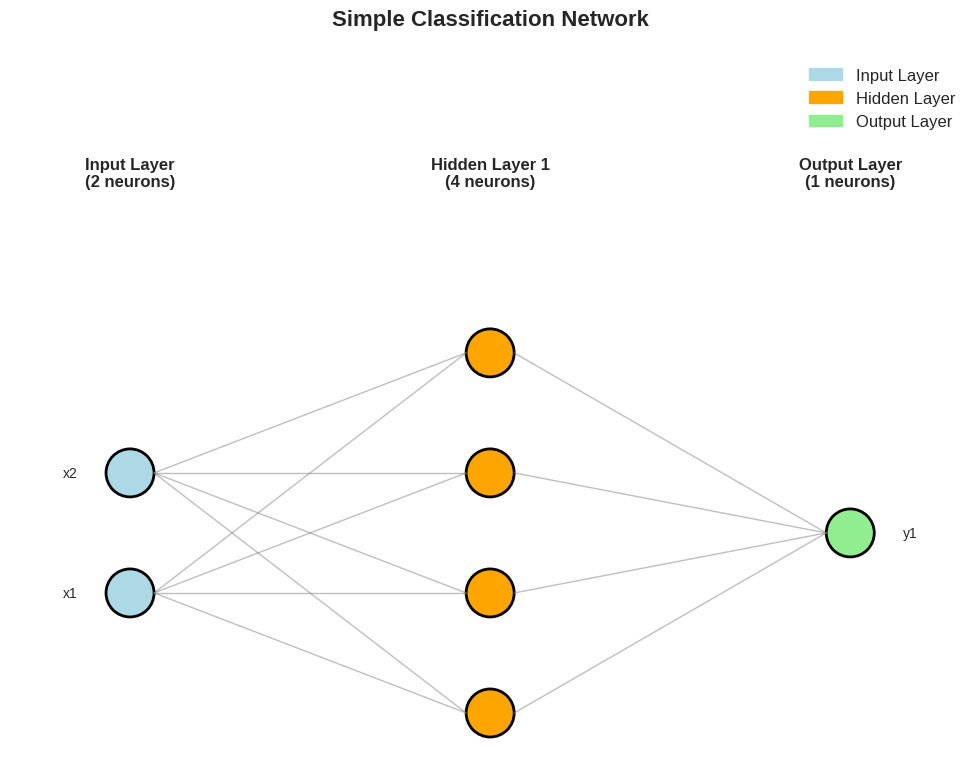

In [13]:
def draw_neural_network(layer_sizes, title="Neural Network Architecture"):
    """Draw a neural network architecture diagram"""
    fig, ax = plt.subplots(figsize=(12, 8))

    layer_positions = []
    max_neurons = max(layer_sizes)

    # Calculate positions for each layer
    for i, size in enumerate(layer_sizes):
        x = i * 3
        y_start = (max_neurons - size) / 2
        positions = [(x, y_start + j) for j in range(size)]
        layer_positions.append(positions)

    # Draw neurons
    for layer_idx, positions in enumerate(layer_positions):
        for neuron_idx, (x, y) in enumerate(positions):
            # Color coding: input=blue, hidden=orange, output=green
            if layer_idx == 0:
                color = 'lightblue'
            elif layer_idx == len(layer_positions) - 1:
                color = 'lightgreen'
            else:
                color = 'orange'

            circle = Circle((x, y), 0.2, color=color, ec='black', linewidth=2)
            ax.add_patch(circle)

            # Add labels
            if layer_idx == 0:
                ax.text(x-0.5, y, f'x{neuron_idx+1}', ha='center', va='center', fontsize=10)
            elif layer_idx == len(layer_positions) - 1:
                ax.text(x+0.5, y, f'y{neuron_idx+1}', ha='center', va='center', fontsize=10)

    # Draw connections
    for layer_idx in range(len(layer_positions) - 1):
        for x1, y1 in layer_positions[layer_idx]:
            for x2, y2 in layer_positions[layer_idx + 1]:
                ax.plot([x1+0.2, x2-0.2], [y1, y2], 'gray', alpha=0.5, linewidth=1)

    # Add layer labels
    layer_names = ['Input Layer'] + [f'Hidden Layer {i}' for i in range(1, len(layer_sizes)-1)] + ['Output Layer']
    for i, (name, size) in enumerate(zip(layer_names, layer_sizes)):
        ax.text(i*3, max_neurons+0.5, f'{name}\n({size} neurons)',
                ha='center', va='center', fontsize=12, fontweight='bold')

    ax.set_xlim(-1, (len(layer_sizes)-1)*3 + 1)
    ax.set_ylim(-0.5, max_neurons + 1.5)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)

    # Add legend
    legend_elements = [
        mpatches.Patch(color='lightblue', label='Input Layer'),
        mpatches.Patch(color='orange', label='Hidden Layer'),
        mpatches.Patch(color='lightgreen', label='Output Layer')
    ]
    ax.legend(handles=legend_elements, loc='upper right')

    plt.tight_layout()
    plt.show()

# Draw different architectures
draw_neural_network([2, 4, 1], "Simple Classification Network")

## Creating Our First Neural Network

Let's build a simple network step by step:

In [14]:
class SimpleNet(nn.Module):
    """A simple feedforward neural network"""

    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNet, self).__init__()

        # Define layers
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.output_activation = nn.Sigmoid()

        # Store architecture info
        self.architecture = [input_size, hidden_size, output_size]

    def forward(self, x):
        """Forward pass through the network"""
        x = self.layer1(x)      # Linear transformation
        x = self.activation(x)   # ReLU activation
        x = self.layer2(x)      # Second linear transformation
        x = self.output_activation(x)  # Sigmoid for probability
        return x

    def get_weights_info(self):
        """Display information about the network's parameters"""
        total_params = sum(p.numel() for p in self.parameters())
        trainable_params = sum(p.numel() for p in self.parameters() if p.requires_grad)

        print(f"Network Architecture: {' → '.join(map(str, self.architecture))}")
        print(f"Total parameters: {total_params}")
        print(f"Trainable parameters: {trainable_params}")

        print("\nLayer details:")
        for name, param in self.named_parameters():
            print(f"{name}: {param.shape} ({param.numel()} parameters)")

# Create and examine a simple network
model = SimpleNet(input_size=2, hidden_size=8, output_size=1)
print("=== Network Information ===")
print(model)
print()
model.get_weights_info()

=== Network Information ===
SimpleNet(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (activation): ReLU()
  (layer2): Linear(in_features=8, out_features=1, bias=True)
  (output_activation): Sigmoid()
)

Network Architecture: 2 → 8 → 1
Total parameters: 33
Trainable parameters: 33

Layer details:
layer1.weight: torch.Size([8, 2]) (16 parameters)
layer1.bias: torch.Size([8]) (8 parameters)
layer2.weight: torch.Size([1, 8]) (8 parameters)
layer2.bias: torch.Size([1]) (1 parameters)


## Alternative Network Definitions

PyTorch offers multiple ways to define networks. Here are the most common approaches:

In [15]:
print("=== Different Network Definition Styles ===\n")

# Method 1: Using nn.Sequential (most concise)
model1 = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)
print("Method 1 - nn.Sequential:")
print(model1)
print()

# Method 2: Custom class (most flexible)
class CustomNetwork(nn.Module):
    def __init__(self):
        super(CustomNetwork, self).__init__()
        self.features = nn.Sequential(
            nn.Linear(2, 8),
            nn.ReLU(),
            nn.Dropout(0.2),  # Regularization
            nn.Linear(8, 4),
            nn.ReLU(),
        )
        self.classifier = nn.Linear(4, 1)
        self.output_act = nn.Sigmoid()

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return self.output_act(x)

model2 = CustomNetwork()
print("Method 2 - Custom Class:")
print(model2)

# Optional: Keep both models available
seq_model = model1
custom_model = model2

=== Different Network Definition Styles ===

Method 1 - nn.Sequential:
Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)

Method 2 - Custom Class:
CustomNetwork(
  (features): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=8, out_features=4, bias=True)
    (4): ReLU()
  )
  (classifier): Linear(in_features=4, out_features=1, bias=True)
  (output_act): Sigmoid()
)


# 4. Data Preparation and Datasets

Let's create some interesting datasets to work with and learn how to prepare data for training.

=== Creating Datasets ===



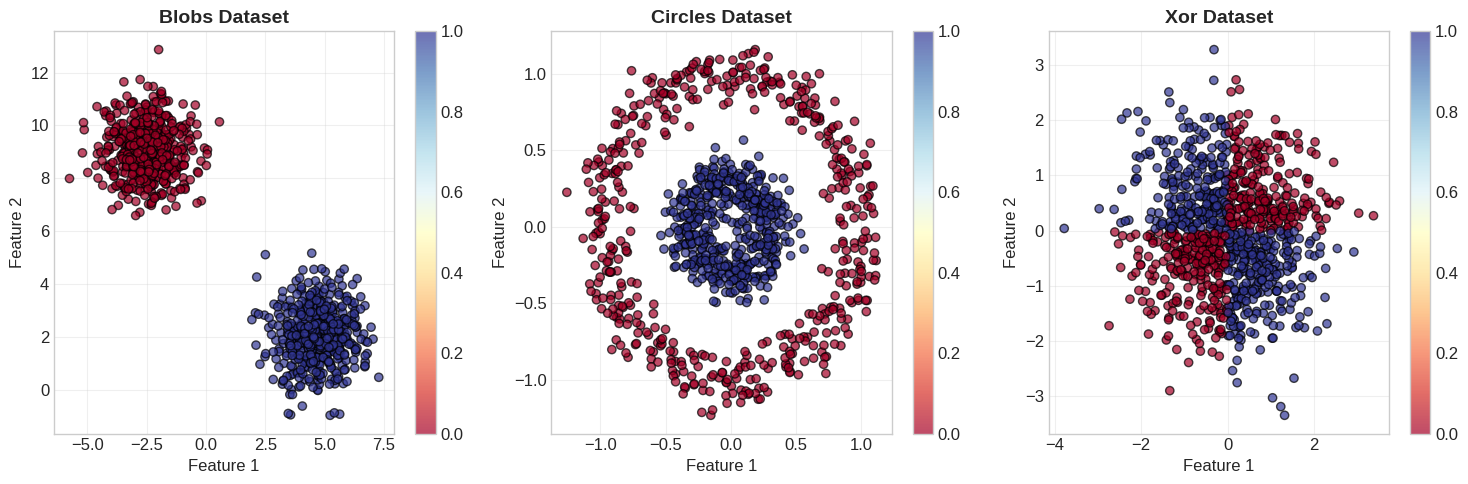

{'blobs': (array([[-1.67350551,  7.88457927],
         [ 6.31757965,  1.41958144],
         [ 3.54360375,  0.5331188 ],
         ...,
         [ 3.26797769,  0.35960829],
         [ 5.76592909,  1.92177596],
         [-0.31939469,  8.20598784]]),
  array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
         1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
         1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
         0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
         0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
         0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
         1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
         1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
         1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
         1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
   

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles

print("=== Creating Datasets ===\n")

# Dataset 1: Simple blobs (linearly separable)
X_blobs, y_blobs = make_blobs(
    n_samples=1000, centers=2, n_features=2,
    cluster_std=1.0, random_state=42
)

# Dataset 2: Circles (non-linearly separable)
X_circles, y_circles = make_circles(
    n_samples=1000, noise=0.1, factor=0.3, random_state=42
)

# Dataset 3: XOR problem
X_xor = np.random.randn(1000, 2)
y_xor = ((X_xor[:, 0] > 0) ^ (X_xor[:, 1] > 0)).astype(int)

datasets = {
    'blobs': (X_blobs, y_blobs),
    'circles': (X_circles, y_circles),
    'xor': (X_xor, y_xor)
}

# Visualize datasets
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (name, (X, y)) in enumerate(datasets.items()):
    ax = axes[idx]
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', alpha=0.7, edgecolors='black')
    ax.set_title(f'{name.capitalize()} Dataset', fontsize=14, fontweight='bold')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()

# Optional: keep datasets in variable
datasets

## Converting Data to PyTorch Format

Let's prepare our data for training by converting to tensors and creating train/test splits:

In [17]:
def prepare_data(X, y, test_size=0.2, device='cpu'):
    """Convert data to PyTorch tensors and split into train/test"""

    # Convert to tensors
    X_tensor = torch.FloatTensor(X)
    y_tensor = torch.FloatTensor(y).reshape(-1, 1)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_tensor, y_tensor, test_size=test_size, random_state=42
    )

    # Move to device
    X_train = X_train.to(device)
    X_test = X_test.to(device)
    y_train = y_train.to(device)
    y_test = y_test.to(device)

    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")
    print(f"Features: {X_train.shape[1]}")
    print(f"Device: {X_train.device}")

    return X_train, X_test, y_train, y_test

# Prepare the circles dataset
X_train, X_test, y_train, y_test = prepare_data(
    datasets['circles'][0], datasets['circles'][1], device=device
)

Training set: 800 samples
Test set: 200 samples
Features: 2
Device: cpu
